# Script that parses on-road & chassis dyno data to plot NOx and CO2 emission as function of vehicle speed and compare it with COPERT5

In [1]:
VELA2Modalfiles = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\LAB'    # 7 diesel veh
#Choose either PEMS or EMROAD files
# PEMSfiles = r''
EMROADfiles = r'K:\PERSONNEL\Bernat\For Victor\COPERT_speed\diesel\EMROAD\EMROAD_NOx'     # 7 diesel veh

In [2]:
#Select Diesel or Gasoline
fuel_type = 'Diesel' 
# fuel_type = 'Gasoline' 

In [3]:
#Select segment
segment = 'Medium' # Mini; Small; Medium; Large-SUV-Executive; N1-II

## END OF USER CHOICES

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
if fuel_type == 'Diesel':
    UNOX = 0.001586
    UCO2 = 0.001517
elif fuel_type == 'Gasoline':
    UNOX = 0.001587
    UCO2 = 0.001518
else:
    print('Please indicate fuel_type = Diesel or Gasoline')

## 1. Parse VELA modal files

In [7]:
#Parse from each VELA2 modal file: vehicle speed and instantaneous vehicle emission (g/s)
LABS = pd.DataFrame()
os.chdir(VELA2Modalfiles)
for file in glob.glob("*\*.xl*"):                                                          # THIS CAN BE XLS OR XLSX, check
    print(file)
    df = pd.read_excel(file, sheetname = 'Data', header = 0, parse_cols = "A:BC")
    df = df.dropna(axis=0, how='all')
    LAB = pd.DataFrame({'Time [s]': df['DACtrl_TraceTime\n[sec]'],
                         'Vehicle speed [km/h]':df['DACtrl_ActualSpeed\n[kph]'],
                        'CO2 [g/s]': df['c_CO2_Dil_g_vec\n[grams]'],
                         'NOx [g/s]':df['c_NOx_Dil_g_vec\n[grams]']},
                        dtype=float)
    #Calculate stop periods. Stop = 1. Move = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] < 1, 'STOP, 0 = YES'] = 0
    LAB.loc[LAB['Vehicle speed [km/h]'] >= 1, 'STOP, 0 = YES'] = 1
    
    #Cold emissions < 150 seconds
#     LAB.loc[LAB['Time [s]'] < 150, 'COLD, 1 = YES'] = 1
#     LAB.loc[LAB['Time [s]'] >= 150, 'COLD, 1 = YES'] = 0
    
    #Calculate distance-specific NOx emission [mg/km] and CO2 [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    LAB['Inst. speed when vehicle moves'] = LAB['Vehicle speed [km/h]']*LAB['STOP, 0 = YES']
    LAB['Inst. Mass NOx when vehicle moves'] = LAB['NOx [g/s]']*LAB['STOP, 0 = YES']
    LAB['Distance when vehicle moves'] = np.where(LAB['Inst. speed when vehicle moves']>0,LAB['Inst. speed when vehicle moves']/3600,0)
    LAB['NOx [mg/km]'] = LAB['Inst. Mass NOx when vehicle moves']*1000/LAB['Distance when vehicle moves']
    LAB['Inst. Mass CO2 when vehicle moves'] = LAB['CO2 [g/s]']*LAB['STOP, 0 = YES']
    LAB['CO2 [g/km]'] = LAB['Inst. Mass CO2 when vehicle moves']/LAB['Distance when vehicle moves']
    #Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
    LAB['Speed range']= pd.cut(LAB['Vehicle speed [km/h]'], np.arange(0,145,10), labels=(np.arange(5,145,10)))
    LAB = LAB.dropna(axis=0, how='all')
    #Merge all routes together
    LABS = LABS.append(LAB)
LABS = LABS.reset_index()

LAB_CO2_med\VELA2_01072016_002_Modal_TP_NEDC_HOT_FWD_23C.xls
LAB_CO2_med\VELA2_01072016_004_Modal_TP_WLTP_HOT_FWD_23C.xls
LAB_CO2_med\VELA2_01122017_002_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_01122017_006_Modal_TP_WLTC_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_02052017_002_Modal_DIL_NEDC_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_03052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_05042017_003_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
LAB_CO2_med\VELA2_05052017_002_Modal_DIL_WLTP_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_05072016_002_Modal_NEDC_HOT_FWD_23C.xls
LAB_CO2_med\VELA2_05072016_005_Modal_WLTP_HOT_FW_23C.xls
LAB_CO2_med\VELA2_06042017_002_Modal_DIL_NEDC_HOT START_4WD_23°C.xls
LAB_CO2_med\VELA2_06072016_003_Modal_WLTP_HOT_FWD_23C.xls
LAB_CO2_med\VELA2_06072017_003_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
LAB_CO2_med\VELA2_06122017_002_Modal_WLTC_HOT_FWD-sync_23°C.xlsx
LAB_CO2_med\VELA2_07072017_002_Modal_DIL_WLTP_HOT START_4WD_23°C.xls
LAB_CO2_med\VELA2_110

In [79]:
LABS['Inst. Mass CO2 when vehicle moves']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.178617
13       0.234737
14       0.250498
15       0.324519
16       0.439777
17       0.520074
18       0.514601
19       0.499587
20       0.602681
21       0.743289
22       0.800078
23       0.835678
24       0.855272
25       0.836043
26       0.857980
27       0.885431
28       0.000000
29       0.000000
           ...   
47739    0.119971
47740    0.113305
47741    0.115686
47742    0.116539
47743    0.109227
47744    0.116707
47745    0.143823
47746    0.140440
47747    0.133292
47748    0.142498
47749    0.000000
47750    0.000000
47751    0.000000
47752    0.000000
47753    0.000000
47754    0.000000
47755    0.000000
47756    0.000000
47757    0.000000
47758    0.000000
47759    0.000000
47760    0.000000
47761    0.000000
47762    0.000000
47763    0

## 2.A Parse EMROAD files

In [8]:
#PARSE EMROAD files: vehicle speed (GPS), and instantaneous vehicle emission (g/s)
TRIPS = pd.DataFrame()
os.chdir(EMROADfiles)
for file in glob.glob("*.xlsx"):          
    veh_id = file[:5]
    route_id = file[6:9]
    test_date = datetime.strptime(file[10:20], '%Y_%m_%d')
    print('Parsing ', veh_id+'_'+route_id+' done on '+ str(test_date.strftime("%A %d. %B %Y")))
    df = pd.read_excel(file, sheetname = 'TEST DATA', skiprows = [0])
    df = df.drop(df.index[0])
    df = df.dropna(axis=0, how='all')
    TRIP = pd.DataFrame({'Time [s]': df['Time'],
                         'Vehicle speed [km/h]':df['GPS Vehicle_Speed'],
                         'NOx [ppm]':df['Wet_NOx'],
                         'CO2 [ppm]': df['Wet_CO2'],
                         'Exhaust Mass Flow [kg/h]':df['Corrected_Exhaust_Mass_Flow'],},
                        dtype=float)
    TRIP['Route'] = route_id
    TRIP['Date'] = test_date.strftime("%d/%b/%Y")
    #Calculate stop periods. Stop = 1. Move = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] < 1, 'STOP, 0 = YES'] = 0
    TRIP.loc[TRIP['Vehicle speed [km/h]'] >= 1, 'STOP, 0 = YES'] = 1
    #Cold emissions < 150 seconds
    TRIP.loc[TRIP['Time [s]'] < 300, 'COLD, 1 = YES'] = 1
    TRIP.loc[TRIP['Time [s]'] >= 300, 'COLD, 1 = YES'] = 0
    #Calculate instaneous NOx and CO2 mass emission [g/s] from exhaust flow and wet emission
    TRIP['Inst. Mass NOx [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['NOx [ppm]']*UNOX/3600
    TRIP['Inst. Mass CO2 [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['CO2 [ppm]']*UCO2/3600
    #Calculate distance-specific NOx  [mg/km] & CO2 emission [g/km]
    #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
    TRIP['Inst. speed when vehicle moves'] = TRIP['Vehicle speed [km/h]']*TRIP['STOP, 0 = YES']
    TRIP['Inst. Mass NOx when vehicle moves'] = TRIP['Inst. Mass NOx [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['Distance when vehicle moves'] = np.where(TRIP['Inst. speed when vehicle moves']>0,TRIP['Inst. speed when vehicle moves']/3600,0)
    TRIP['NOx [mg/km]'] = TRIP['Inst. Mass NOx when vehicle moves']*1000/TRIP['Distance when vehicle moves']
    TRIP['Inst. Mass CO2 when vehicle moves'] = TRIP['Inst. Mass CO2 [g/s]']*TRIP['STOP, 0 = YES']
    TRIP['CO2 [g/km]'] = TRIP['Inst. Mass CO2 when vehicle moves']/TRIP['Distance when vehicle moves']
    #Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
    TRIP['Speed range']= pd.cut(TRIP['Vehicle speed [km/h]'], np.arange(0,145,10), labels=(np.arange(5,145,10)))
    TRIP = TRIP.dropna(axis=0, how='all')
    #Merge all routes together
    TRIPS = TRIPS.append(TRIP)
TRIPS = TRIPS.reset_index()

Parsing  BW014_ESP done on Tuesday 24. October 2017
Parsing  BW014_ESP done on Wednesday 25. October 2017
Parsing  BW014_ESP done on Thursday 26. October 2017
Parsing  BW014_LAB done on Tuesday 24. October 2017
Parsing  BW014_LAB done on Wednesday 25. October 2017
Parsing  CN002_ESP done on Thursday 16. June 2016
Parsing  CN002_ESP done on Friday 17. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_ESP done on Monday 20. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Friday 24. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  CN002_LAB done on Tuesday 28. June 2016
Parsing  FT058_ESP done on Tuesday 18. April 2017
Parsing  FT058_ESP done on Wednesday 19. April 2017
Parsing  FT058_ESP done on Thursday 20. April 2017
Parsing  FT058_LAB done on Tuesday 18. April 2017
Parsing  FT058_LAB done on Wednesday 19. April 2017
Parsing  KA001_ESP done on Monday 20. November 2017
Parsing  KA001_ESP done on Tuesday 21. N

### 2.B alternatively parse PEMS files (AVL-MOVE)

In [ ]:
# #Parse from each PEMS file: vehicle speed (GPS), and instantaneous vehicle emission (g/s)
# TRIPS = pd.DataFrame()
# os.chdir(PEMSfiles)
# for file in glob.glob("*.xlsx"):
#     veh_id = file[:5]
#     route_id = file[6:9]
#     test_date = datetime.strptime(file[10:20], '%Y_%m_%d')
#     print('Parsing ', veh_id+'_'+route_id+' done on '+ str(test_date.strftime("%A %d. %B %Y")))
#     df = pd.read_excel(file, header = 0, parse_cols = "A:Z")
#     df = df.drop(df.index[0])
#     df = df.dropna(axis=0, how='all')
#     TRIP = pd.DataFrame({'Time [s]': df['Time'],
#                          'Vehicle speed [km/h]':df['Velocity GPS'],
#                          'NOx [ppm]':df['y_NOx'],
#                          'CO2 [ppm]': df['y_CO2'],
#                          'Exhaust Mass Flow [kg/h]':df['Exhaust Mass Flow'],},
#                         dtype=float)
#     # Calculate and append the distance array [km]
#     TRIP['Distance [km]'] = pd.Series((TRIP['Vehicle speed [km/h]']/3600), index=TRIP.index)
#     TRIP['Route'] = route_id
#     TRIP['Date'] = test_date.strftime("%d/%b/%Y")
#     #Calculate stop periods. Stop = 1. Move = 0
#     TRIP.loc[TRIP['Vehicle speed [km/h]'] < 1, 'STOP, 0 = YES'] = 0
#     TRIP.loc[TRIP['Vehicle speed [km/h]'] >= 1, 'STOP, 0 = YES'] = 1
#     #Cold emissions < 150 seconds
#     TRIP.loc[TRIP['Time [s]'] < 150, 'COLD, 1 = YES'] = 1
#     TRIP.loc[TRIP['Time [s]'] >= 150, 'COLD, 1 = YES'] = 0
#     #Calculate instaneous NOx and CO2 mass emission [g/s] from exhaust flow and wet emission
#     TRIP['Inst. Mass NOx [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['NOx [ppm]']*UNOX/3600
#     TRIP['Inst. Mass CO2 [g/s]'] = TRIP['Exhaust Mass Flow [kg/h]']*TRIP['CO2 [ppm]']*UCO2/3600
#     #Calculate distance-specific NOx  [mg/km] & CO2 emission [g/km]
#     #Seconds when vehicle is stopped (< 1 km/h) do not get distance-specific emission calculation.
#     TRIP['Inst. speed when vehicle moves'] = TRIP['Vehicle speed [km/h]']*TRIP['STOP, 0 = YES']
#     TRIP['Inst. Mass NOx when vehicle moves'] = TRIP['Inst. Mass NOx [g/s]']*TRIP['STOP, 0 = YES']
#     TRIP['Distance when vehicle moves'] = np.where(TRIP['Inst. speed when vehicle moves']>0,TRIP['Inst. speed when vehicle moves']/3600,0)
#     TRIP['NOx [mg/km]'] = TRIP['Inst. Mass NOx when vehicle moves']*1000/TRIP['Distance when vehicle moves']
#     TRIP['Inst. Mass CO2 when vehicle moves'] = TRIP['Inst. Mass CO2 [g/s]']*TRIP['STOP, 0 = YES']
#     TRIP['CO2 [g/km]'] = TRIP['Inst. Mass CO2 when vehicle moves']/TRIP['Distance when vehicle moves']
#     #Reclassify vehicle speed in bins of 10 km/h. Labels indicate half of the bin speed.
#     TRIP['Speed range']= pd.cut(TRIP['Vehicle speed [km/h]'], np.arange(0,145,10), labels=(np.arange(5,145,10)))
#     TRIP = TRIP.dropna(axis=0, how='all')
#     #Merge all routes together
#     TRIPS = TRIPS.append(TRIP)
# TRIPS = TRIPS.reset_index()

## 3. Split COLD and HOT emissions

In [13]:
coldTRIPS = TRIPS[TRIPS['COLD, 1 = YES'] == 1]
warmTRIPS = TRIPS[TRIPS['COLD, 1 = YES'] == 0]

In [36]:
LABS.columns

Index(['index', 'CO2 [g/s]', 'NOx [g/s]', 'Time [s]', 'Vehicle speed [km/h]',
       'STOP, 0 = YES', 'Inst. speed when vehicle moves',
       'Inst. Mass NOx when vehicle moves', 'Distance when vehicle moves',
       'NOx [mg/km]', 'Inst. Mass CO2 when vehicle moves', 'CO2 [g/km]',
       'Speed range'],
      dtype='object')

In [14]:
coldLABS = LABS#[LABS['COLD, 1 = YES'] == 1]
warmLABS = LABS#[LABS['COLD, 1 = YES'] == 0]

## 4. Import COPERT emissions
### Below is an extraction of COPERT5 emission factors for HOT and COLD emissions for EURO 6 vehicles (gasoline and diesel) for NOx and CO2. For NOx, COPERT provides a unique emission factor curve for all segments, whereas as for CO2, there are several emission factor lines depending on the vehicle segment.

In [15]:
COPERT_x = np.arange(10,140,10)
#DIESEL
## HOT NOx (Euro 6 up to 2016)
COPERT_NOxH_D_y = [818.6735244, 650.786133, 554.9328628, 488.6350055, 442.1591933, 411.9028883, 396.5422131, 396.122562, 411.9104063, 446.6303416, 505.1164426, 595.6781016, 732.9936337]
## HOT NOx LCV (Euro 6 up to 2017)
COPERT_NOxH_DLCV_y = [1315.446535, 1056.071174, 966.3911952, 922.7661543, 903.3628061, 905.4140312, 934.90859, 1006.133543, 1143.457552, 1379.609277, 1736.439437, 2173.013645, 2549.627755]
## HOT CO2 
COPERT_CO2H_D_mini_y = [205.9614428,127.8919211,105.6643416,98.50874733,97.42615155,99.29628668,102.7573462,107.1245326,112.0189459,117.2162149,122.5767304,128.0104079,133.4575731]
COPERT_CO2H_D_small_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_medium_y = [268.7569869,201.7833634,171.4808445,155.0346646,145.4955563,140.0967925,137.6006418,137.4814386,139.6484265,144.3944831,152.5179486,165.7278212,187.7985386]
COPERT_CO2H_D_LSE_y = [371.8114893,278.6017742,232.3134944,206.9172051,192.9687978,186.2899384,184.8275364,187.5466378,193.9807461,204.039236,217.9356567,236.1893114,259.691025]
COPERT_CO2H_DLCV_y = [398.8751795,281.0620062,235.9180384,214.5017732,204.2906457,200.6739172,201.6673049,206.4120283,214.6529791,226.5543252,242.6717533,264.0389623,292.3964226]


#GASOLINE
## HOT NOx
COPERT_NOxH_G_y = [55.02533777, 45.05171208, 37.90261269, 32.34940427, 27.85327257, 24.11821713, 20.9576872, 18.24469747, 15.88849121, 13.82194437, 11.99410598, 10.3654906, 8.904967399]
## HOT CO2 
COPERT_CO2H_G_mini_y = [238.0998286, 175.1471197, 140.4435812, 122.7711525, 115.5049756, 114.6495056, 117.7453852, 123.2512805, 130.1867257, 137.9209987, 146.0454992, 154.2949665, 162.4978992]
COPERT_CO2H_G_small_y = [303.6656843, 227.7744872, 183.4655019, 158.5240858, 145.6443469, 140.3683673, 139.9199999, 142.5374995, 147.0843214, 152.8172187, 159.2450414, 166.0409634, 172.9868566]
COPERT_CO2H_G_medium_y = [340.3732375, 257.5594346, 215.4681181, 191.7257645, 178.0045659, 170.5270757, 167.3630174, 167.4555069, 170.2122382, 175.3153071, 182.6273176, 192.1450204, 203.979569]
COPERT_CO2H_G_LSE_y = [533.1188866, 390.7685786, 316.8977024, 272.9201059, 244.905522, 226.6721595, 215.1429351, 208.7216504, 206.6440483, 208.7184744, 215.2707733, 227.2597736, 246.6438299]

### Formula to get NOx EF for COPERT 5 (Guidebook 2016)

In [16]:
# HOT NOx parameters, diesel medium (although for NOx there shouldn't be categorizatoin by engine capacity)

alpha = 6.67136e-5
beta = -0.011381467
gamma = 0.945951727
delta = 1.923608149
epsilon = -5.15046e-5
zeta = 0.004264272
eta = 1 

RF_2016 = 0.17630645       # reduction factor for Euro 6 b,c (up to 2016)
RF_2017 = 0.370710835      # RF for Euro 6 d_temp (2017-2019)
# RF = 0.694345263      # RF for Euro 6 d (2020+) 

speed = np.arange(10,140,10) # in km/h

EF_2016 = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta) * (1-RF_2016)
EF_2017 = (alpha*speed*speed + beta*speed + gamma + delta/speed)/(epsilon*speed*speed + zeta*speed + eta) * (1-RF_2017)
EF_2016

array([ 0.81867352,  0.65078613,  0.55493286,  0.48863501,  0.44215919,
        0.41190289,  0.39654221,  0.39612256,  0.41191041,  0.44663034,
        0.50511644,  0.5956781 ,  0.73299363])

### Formula to get NOx EF for COPERT 4(?) (Guidebook 2013)

In [52]:
# Euro 6 - COPERT 4
a = 4.36e-1
b = 1e-2
c = -5.39e-3
d = -1.02e-4
e = 2.90e-5
f = -4.61e-1

speed = np.arange(10,140,10) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6 =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6

array([ 0.31097449,  0.27324879,  0.23591569,  0.20639958,  0.18456225,
        0.16978964,  0.16181827,  0.16094622,  0.16826018,  0.18611224,
        0.21922972,  0.27756884,  0.38502924])

In [53]:
# Euro 6 c - COPERT 4

a = 2.33e-1
b = 1e-2
c = -2.88e-3
d = -1.02e-4
e = 1.55e-5
f = 2.46e-1

speed = np.arange(10,140,10) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_6c =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_6c

array([ 0.21136906,  0.16727053,  0.13967058,  0.12027005,  0.10656225,
        0.09742051,  0.09237151,  0.09141824,  0.09506736,  0.10455102,
        0.12241437,  0.15406182,  0.21249967])

In [71]:
# Euro 5 - COPERT 4
a = 9.46e-1
b = 4.26e-3
c = -1.14e-2
d = -5.15e-5
e = 6.67e-5
f = 1.92

speed = np.arange(10,140,10) # in km/h

# EF_COP4 = (a + c*speed + e*speed*speed)/(1 + b*speed + d*speed*speed) + f/speed  # WRONG formula
EF_COP4_5 =  (a + c*speed + e*speed*speed + f / speed )/(1 + b*speed + d*speed*speed)
EF_COP4_5

array([ 0.99346475,  0.78966748,  0.67319802,  0.59257353,  0.53599262,
        0.49908428,  0.48023959,  0.47950949,  0.49842518,  0.5402854 ,
        0.6109463 ,  0.72047817,  0.88667676])

## Check speed distribution for cold and warm sections

In [66]:
a1=coldTRIPS[['NOx [mg/km]','Speed range']]
a1= a1.dropna(axis=0, how='any')
# a2 = coldLABS[['NOx [mg/km]','Speed range']]
# a2= a2.dropna(axis=0, how='any')
a3=warmTRIPS[['NOx [mg/km]','Speed range']]
a3= a3.dropna(axis=0, how='any')
a4 = warmLABS[['NOx [mg/km]','Speed range']]
a4= a4.dropna(axis=0, how='any')
c1=coldTRIPS[['CO2 [g/km]','Speed range']]
c1= c1.dropna(axis=0, how='any')
# c2 = coldLABS[['CO2 [g/km]','Speed range']]
# c2= c2.dropna(axis=0, how='any')
c3=warmTRIPS[['CO2 [g/km]','Speed range']]
c3= c3.dropna(axis=0, how='any')
c4 = warmLABS[['CO2 [g/km]','Speed range']]
c4= c4.dropna(axis=0, how='any')

In [141]:
#a3['Speed range'] = a3['Speed range'].astype('category')

In [69]:
warmTRIPS

,index,CO2 [ppm],Exhaust Mass Flow [kg/h],NOx [ppm],Time [s],Vehicle speed [km/h],Route,Date,"STOP, 0 = YES","COLD, 1 = YES",Inst. Mass NOx [g/s],Inst. Mass CO2 [g/s],Inst. speed when vehicle moves,Inst. Mass NOx when vehicle moves,Distance when vehicle moves,NOx [mg/km],Inst. Mass CO2 when vehicle moves,CO2 [g/km],Speed range
300,301,2881.980522,58.228924,3.805036,300.0,39.699414,ESP,24/Oct/2017,1.0,0.0,9.761087e-05,0.070715,39.699414,0.000098,0.011028,8.851494,0.070715,6.412558,35.0
301,302,4415.564175,52.721417,3.667392,301.0,39.400195,ESP,24/Oct/2017,1.0,0.0,8.518147e-05,0.098097,39.400195,0.000085,0.010944,7.783040,0.098097,8.963146,35.0
302,303,10012.046275,56.239696,3.593618,302.0,39.501356,ESP,24/Oct/2017,1.0,0.0,8.903804e-05,0.237273,39.501356,0.000089,0.010973,8.114580,0.237273,21.624167,35.0
303,304,23271.943559,55.474689,3.646458,303.0,40.200001,ESP,24/Oct/2017,1.0,0.0,8.911827e-05,0.544015,40.200001,0.000089,0.011167,7.980741,0.544015,48.717731,45.0
304,305,37372.912375,57.591646,3.866096,304.0,41.000000,ESP,24/Oct/2017,1.0,0.0,9.809182e-05,0.906984,41.000000,0.000098,0.011389,8.612940,0.906984,79.637599,45.0
305,306,46416.113569,56.498467,4.338859,305.0,41.599998,ESP,24/Oct/2017,1.0,0.0,1.079973e-04,1.105067,41.599998,0.000108,0.011556,9.345920,1.105067,95.630782,45.0
306,307,51077.895519,56.776099,5.494371,306.0,42.200001,ESP,24/Oct/2017,1.0,0.0,1.374308e-04,1.222029,42.200001,0.000137,0.011722,11.723959,1.222029,104.248945,45.0
307,308,52790.981815,55.145001,6.559679,307.0,42.299999,ESP,24/Oct/2017,1.0,0.0,1.593637e-04,1.226730,42.299999,0.000159,0.011750,13.562870,1.226730,104.402550,45.0
308,309,52167.794435,55.583130,7.491992,308.0,42.400002,ESP,24/Oct/2017,1.0,0.0,1.834598e-04,1.221880,42.400002,0.000183,0.011778,15.576777,1.221880,103.744524,45.0
309,310,49302.630533,54.947443,8.302507,309.0,42.400002,ESP,24/Oct/2017,1.0,0.0,2.009821e-04,1.141565,42.400002,0.000201,0.011778,17.064518,1.141565,96.925329,45.0


In [150]:
road = a3.groupby('Speed range').mean()
lab = a4.groupby('Speed range').mean()

#road.drop(road.index[len(road)-1])
road[:-1]

,NOx [mg/km]
Speed range,
5.0,891.407612
15.0,424.933749
25.0,364.358407
35.0,321.099341
45.0,205.160361
55.0,251.601981
65.0,452.114382
75.0,337.485325
85.0,295.279952


In [13]:
x = a1['Speed range'],a2['Speed range']
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
colors = ['red', 'lime']
labels = ['on-road', 'chassis dyno']
ax0.hist(x, 13, normed=1, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 14})
ax0.set_title('Speed distribution. Bins of 10 km/h - COLD DATA', fontsize = 16)
ax0.set_ylabel('relative time share', fontsize = 18)
ax0.set_xlabel('vehicle speed', fontsize = 18)
ax0.set_xticks(np.arange(10,65,10))
plt.show()

NameError: name 'a2' is not defined

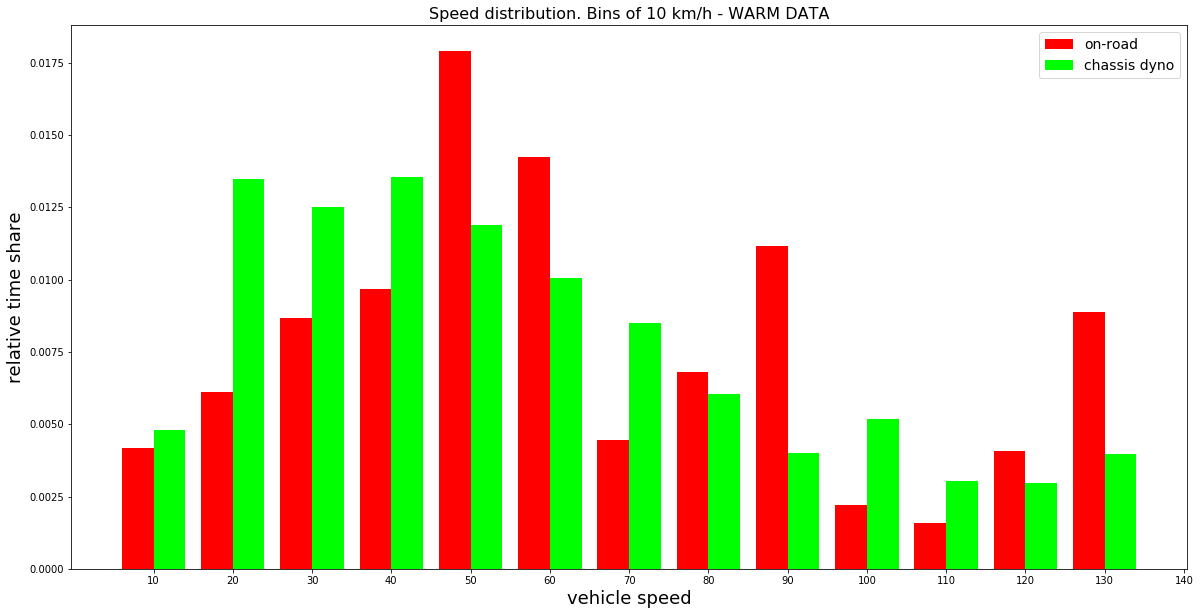

In [19]:
x = a3['Speed range'],a4['Speed range']
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
colors = ['red', 'lime']
labels = ['on-road', 'chassis dyno']
ax0.hist(x, 13, normed=1, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 14})
ax0.set_title('Speed distribution. Bins of 10 km/h - WARM DATA', fontsize = 16)
ax0.set_ylabel('relative time share', fontsize = 18)
ax0.set_xlabel('vehicle speed', fontsize = 18)
ax0.set_xticks(np.arange(10,145,10))
plt.show()

#  Plot speed-dependent emission factors 

## CO2 WARM

In [64]:
# fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
# #c4 is warm lab
# bp = c4.boxplot(by='Speed range', return_type='dict',
#                                 showmeans = True, grid = False, widths = 0.2, 
#                positions = np.arange(14)-0.15, showfliers = True, whis = [25,75], #showcaps = False, #whis = [25,75], 
#                meanprops=(dict(marker='o',markerfacecolor='red', markersize=8)),
#                ax=ax0)
# [ [item.set_color('r') for item in bp[key]['boxes']] for key in bp.keys() ]
# [ [item.set_color('r') for item in bp[key]['medians']] for key in bp.keys() ]
# #c3 is warm on-road
# bp2 = c3.boxplot(by='Speed range', return_type='dict',
#                                 showmeans = True, grid = False, widths = 0.2, 
#                positions = np.arange(14)+0.15, showfliers = False, whis = [25,75], showcaps = False,
#                meanprops=(dict(marker='o',markerfacecolor='blue', markersize=8)),
#                 ax=ax0)
# [ [item.set_color('blue') for item in bp2[key]['boxes']] for key in bp2.keys() ]
# [ [item.set_color('blue') for item in bp2[key]['medians']] for key in bp2.keys() ]
# plt.ylabel('CO2 [g/km]', fontsize = 20)
# plt.xlabel('Vehicle speed [km/h]', fontsize = 20)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.ylim(-10,500)
# plt.suptitle('COPERT 5 vs On-road vs Chassis dyno CO2 distance-specific emissions as function of speed', fontsize = 20)
# #plt.grid(True)
# import seaborn as sns
# if segment == 'N1-II':
#     sns.pointplot(x= COPERT_x, y= COPERT_CO2H_DLCV_y, color ='green')
#     plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = 20)
# elif fuel_type == 'Gasoline':
#     if segment == 'Mini':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_mini_y,
#                          color ='green')
#             plt.title('Diesel Euro 6 gasoline mini vehicle - HOT emissions', fontsize = 20)
#     elif segment == 'Small':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_small_y,
#                           color ='green')
#             plt.title('Diesel Euro 6 gasoline small vehicle - HOT emissions', fontsize = 20)
#     elif segment == 'Medium':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_medium_y,
#                           color ='green')
#             plt.title('Diesel Euro 6 gasoline medium vehicle - HOT emissions', fontsize = 20)
#     else:
#         sns.pointplot(x= COPERT_x, y= COPERT_CO2H_G_LSE_y, label = 'COPERT 5', color ='green')
#         plt.title('Diesel Euro 6 gasoline Large/SUV/Executive vehicle - HOT emissions', fontsize = 20)
# elif fuel_type == 'Diesel':
#     if segment == 'Mini':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_mini_y,
#                           color ='green')
#             plt.title('Diesel Euro 6 diesel mini vehicle - HOT emissions', fontsize = 20)
#     elif segment == 'Small':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_small_y,
#                           color ='green')
#             plt.title('Diesel Euro 6 diesel small vehicle - HOT emissions', fontsize = 20)
#     elif segment == 'Medium':
#             sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_medium_y,
#                           color ='green')
#             plt.title('Diesel Euro 6 diesel medium vehicle - HOT emissions', fontsize = 20)
#     else:
#         sns.pointplot(x= COPERT_x, y= COPERT_CO2H_D_LSE_y, color ='green')
#         plt.title('Diesel Euro 6 diesel Large/SUV/Executive vehicle - HOT emissions', fontsize = 20)
# plt.figtext(0.78, 0.86, 'COPERT 5', fontsize = 22, color = 'green')
# plt.figtext(0.78, 0.82, 'Dyno', fontsize = 22, color = 'red')
# plt.figtext(0.78, 0.78, 'On-road', fontsize = 22, color = 'blue')
# plt.show()
# mpl.rcdefaults()


### CO2 COLD

In [ ]:
# fig, ax1 = plt.subplots(figsize=(20, 10))
# #c2 is cold lab
# bp3 = c2.boxplot(by='Speed range', return_type='dict',
#                 showmeans = True, grid = False, widths = 0.2, 
#                 showfliers = False, whis = [25,75], showcaps = False,
# #                  positions = np.arange(5)-0.15,
#                 meanprops=(dict(marker='o',markerfacecolor='red', markersize=8)),
#                 ax=ax1)
# [ [item.set_color('r') for item in bp3[key]['boxes']] for key in bp3.keys() ]
# [ [item.set_color('r') for item in bp3[key]['medians']] for key in bp3.keys() ]
# #c1 is cold on-road
# bp4 = c1.boxplot(by='Speed range', return_type='dict',
#                                 showmeans = True, grid = False, widths = 0.2,
# #                  positions = np.arange(13)+0.15,
#                  showfliers = False, whis = [25,75], showcaps = False,
#                meanprops=(dict(marker='o',markerfacecolor='blue', markersize=8)),
#                 ax=ax1)
# [ [item.set_color('blue') for item in bp4[key]['boxes']] for key in bp4.keys() ]
# [ [item.set_color('blue') for item in bp4[key]['medians']] for key in bp4.keys() ]
# plt.ylabel('CO2 [g/km]', fontsize = 20)
# plt.xlabel('Vehicle speed [km/h]', fontsize = 20)
# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)
# plt.ylim(-10,1000)
# plt.xlim(0.5,6.5)
# plt.suptitle('On-road vs Chassis dyno CO2 distance-specific emissions as function of speed', fontsize = 20)
# if fuel_type == 'Gasoline':
#     plt.title('Diesel Euro 6 gasoline vehicle - COLD emissions', fontsize = 20)
# elif fuel_type == 'Diesel':
#     plt.title('Diesel Euro 6 diesel vehicle - COLD emissions', fontsize = 20)
# plt.figtext(0.78, 0.82, 'Dyno', fontsize = 22, color = 'red')
# plt.figtext(0.78, 0.78, 'On-road', fontsize = 22, color = 'blue')
# plt.show()

## NOX

In [62]:
# fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
# fontsize = 24
# medianprops_a4 = dict(linestyle=' ', linewidth=1, color='red')
# medianprops_a3 = dict(linestyle=' ', linewidth=1, color='blue')

# #a4 is warm lab NOx
# bp = a4.boxplot(by='Speed range', return_type='dict',
#                 showmeans = True, grid = False, widths = 0.1, figsize=(20, 10), showbox = False,
#                 positions = np.arange(14)-0.15, showfliers = False, whis = [25,75], showcaps = False,
#                 meanprops=(dict(marker='o',markerfacecolor='red', markersize=8)), medianprops = medianprops_a4,
#                 ax=ax0)
# [ [item.set_color('r') for item in bp[key]['boxes']] for key in bp.keys() ]
# [ [item.set_color('r') for item in bp[key]['medians']] for key in bp.keys() ]
# plt.ylabel('NOx [mg/km]', fontsize = 20)
# plt.xlabel('Vehicle speed [km/h]', fontsize = 20)
# #a3 is warm on-road NOx
# bp2 = a3.boxplot(by='Speed range', return_type='dict', showmeans = True, grid = False, showbox = False,
#                  widths = 0.1, figsize=(20, 10), medianprops = medianprops_a3,
#                  positions = np.arange(14)+0.15, showfliers = False, whis = [25,75], showcaps = False,
#                  meanprops=(dict(marker='o',markerfacecolor='blue', markersize=8)),
#                  ax=ax0)
# [ [item.set_color('blue') for item in bp2[key]['boxes']] for key in bp2.keys() ]
# [ [item.set_color('blue') for item in bp2[key]['medians']] for key in bp2.keys() ]

# plt.ylabel('NO$_x$ [mg/km]', fontsize = fontsize)
# plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
# plt.xticks(fontsize = fontsize)
# plt.yticks(fontsize = fontsize)
# #plt.ylim(-10,1000)
# plt.suptitle("")#('COPERT 5 vs On-road vs Chassis dyno NO$_x$ emissions as function of speed', fontsize = fontsize)
# import seaborn as sns
# if segment == 'N1-II':
#     sns.pointplot(x= COPERT_x, y= COPERT_NOxH_DLCV_y, color ='green')
#     plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
# elif fuel_type == 'Gasoline':
#     sns.pointplot(x= COPERT_x, y= COPERT_NOxH_G_y, color ='green')
#     plt.title('Diesel Euro 6 gasoline vehicle - HOT emissions', fontsize = fontsize)
# elif fuel_type == 'Diesel':
#     sns.pointplot(x= COPERT_x, y= EF_2016*1000, color ='green')
#     sns.pointplot(x= COPERT_x, y= EF_2017*1000, color ='orange')
#     sns.pointplot(x= COPERT_x, y= EF_COP4*1000, color ='purple')
    
#     plt.title("")#('Euro 6 diesel vehicle - HOT emissions', fontsize = fontsize)
# plt.figtext(0.71, 0.86, 'COPERT 5 (2016)', fontsize = 22, color = 'green')
# plt.figtext(0.71, 0.82, 'COPERT 5 (2017-2019)', fontsize = 22, color = 'orange')
# plt.figtext(0.71, 0.78, 'Fig 3 Ntziachristos (approx)', fontsize = 22, color = 'purple')
# plt.figtext(0.71, 0.74, 'Laboratory', fontsize = 22, color = 'red')
# plt.figtext(0.71, 0.70, 'On-road', fontsize = 22, color = 'blue')
# plt.show()

# mpl.rcdefaults()

In [30]:
# points from Ntziachristos, create the line

x = [30.667476017043963,70.31136185103193,109.88669094717801]
y = [0,0,257.4162679425838,0,0,0,173.2057416267944,0,0,0,226.79425837320582,0,0]

y

[0,
 0,
 257.4162679425838,
 0,
 0,
 0,
 173.2057416267944,
 0,
 0,
 0,
 226.79425837320582,
 0,
 0]

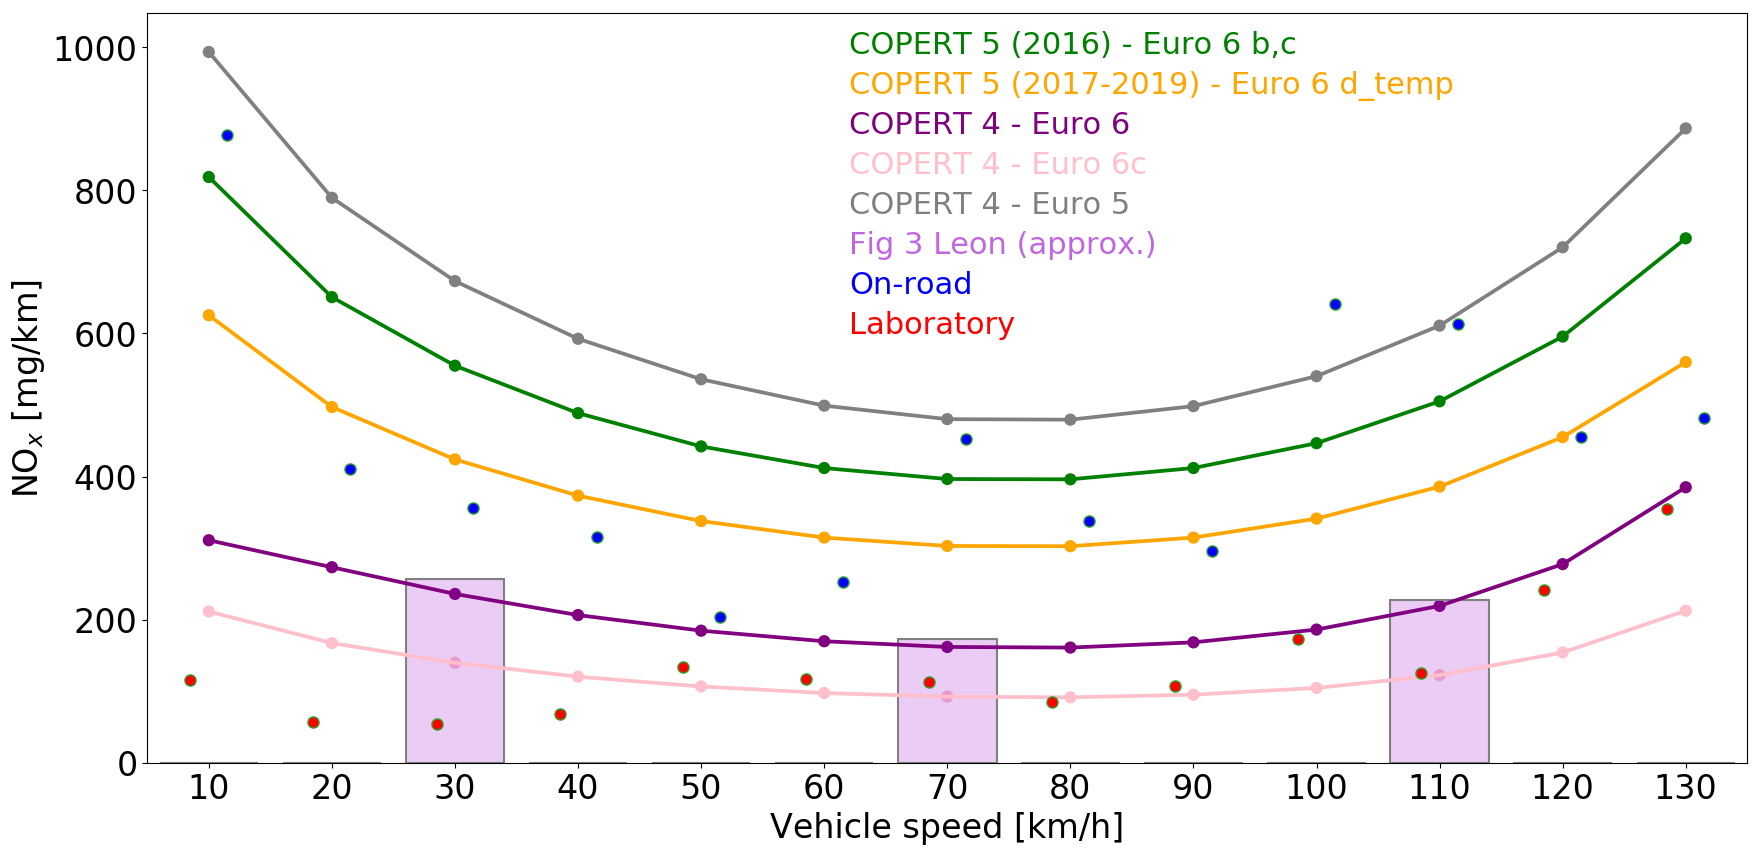

In [74]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
fontsize = 24
medianprops_a4 = dict(linestyle=' ', linewidth=1, color='red')
medianprops_a3 = dict(linestyle=' ', linewidth=1, color='blue')

# Ntziachristos



#a4 is warm lab NOx
bp = a4.boxplot(by='Speed range', return_type='dict',
                showmeans = True, grid = False, widths = 0.1, figsize=(20, 10), showbox = False,
                positions = np.arange(14)-0.15, showfliers = False, whis = [25,75], showcaps = False,
                meanprops=(dict(marker='o',markerfacecolor='red', markersize=8)), medianprops = medianprops_a4,
                ax=ax0)
[ [item.set_color('r') for item in bp[key]['boxes']] for key in bp.keys() ]
[ [item.set_color('r') for item in bp[key]['medians']] for key in bp.keys() ]
plt.ylabel('NOx [mg/km]', fontsize = 20)
plt.xlabel('Vehicle speed [km/h]', fontsize = 20)
#a3 is warm on-road NOx
bp2 = a3.boxplot(by='Speed range', return_type='dict', showmeans = True, grid = False, showbox = False,
                 widths = 0.1, figsize=(20, 10), medianprops = medianprops_a3,
                 positions = np.arange(14)+0.15, showfliers = False, whis = [25,75], showcaps = False,
                 meanprops=(dict(marker='o',markerfacecolor='blue', markersize=8)),
                 ax=ax0)
[ [item.set_color('blue') for item in bp2[key]['boxes']] for key in bp2.keys() ]
[ [item.set_color('blue') for item in bp2[key]['medians']] for key in bp2.keys() ]

plt.ylabel('NO$_x$ [mg/km]', fontsize = fontsize)
plt.xlabel('Vehicle speed [km/h]', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
#plt.ylim(-10,1000)
plt.suptitle("")#('COPERT 5 vs On-road vs Chassis dyno NO$_x$ emissions as function of speed', fontsize = fontsize)
import seaborn as sns
if segment == 'N1-II':
    sns.pointplot(x= COPERT_x, y= COPERT_NOxH_DLCV_y, color ='green')
    plt.title('Diesel Euro 6 light commercial vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Gasoline':
    sns.pointplot(x= COPERT_x, y= COPERT_NOxH_G_y, color ='green')
    plt.title('Diesel Euro 6 gasoline vehicle - HOT emissions', fontsize = fontsize)
elif fuel_type == 'Diesel':
    sns.pointplot(x= COPERT_x, y= EF_2016*1000, color ='green')
    sns.pointplot(x= COPERT_x, y= EF_2017*1000, color ='orange')
    sns.pointplot(x= COPERT_x, y= EF_COP4_6*1000, color ='purple')
    sns.pointplot(x= COPERT_x, y= EF_COP4_6c*1000, color ='pink')
    sns.pointplot(x= COPERT_x, y= EF_COP4_5*1000, color ='gray')
    sns.barplot(x= COPERT_x, y= y, color ='purple',linewidth=1.5, facecolor=(0.6, 0, 0.82, 0.2),
                  errcolor=".2", edgecolor=".5")
  
    
    
    plt.title("")#('Euro 6 diesel vehicle - HOT emissions', fontsize = fontsize)
plt.figtext(0.451, 0.86, 'COPERT 5 (2016) - Euro 6 b,c', fontsize = 22, color = 'green')
plt.figtext(0.451, 0.82, 'COPERT 5 (2017-2019) - Euro 6 d_temp', fontsize = 22, color = 'orange')
plt.figtext(0.451, 0.78, 'COPERT 4 - Euro 6', fontsize = 22, color = 'purple')
plt.figtext(0.451, 0.74, 'COPERT 4 - Euro 6c', fontsize = 22, color = 'pink')
plt.figtext(0.451, 0.7, 'COPERT 4 - Euro 5', fontsize = 22, color = 'gray')
plt.figtext(0.451, 0.66, 'Fig 3 Leon (approx.)', fontsize = 22, color = [0.6, 0, 0.82, 0.6])
plt.figtext(0.451, 0.62, 'On-road', fontsize = 22, color = 'blue')
plt.figtext(0.451, 0.58, 'Laboratory', fontsize = 22, color = 'red')
plt.show()

mpl.rcdefaults()